# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [25]:
# enter your code here
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR",data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Sat, 06 Jun 2020   Prob (F-statistic):             0.0991
Time:                        07:33:43   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

The older people have 0.0091 units higher BMI than younger people.

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

NO. The diffference(0.0091) is not statistically significant as the p value is high so we are not confident that there is a relationship between BMI and age

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

They differ by 0.182 units (calc. by 0.0091 x difference of ages provided)

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

In [26]:
#we calculate correlation r_Squared to calculate variation in bmi because of this age control variable 
cc = da[["BMXBMI","RIDAGEYR"]].corr()
print(cc.BMXBMI.RIDAGEYR**2)

0.0005331238438369014


0.0005 is the variation in BMI due to age

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [27]:
# enter your code here
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male",2:"Female"})
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American",2: "Other Hispanic",3: "Non-Hispanic White",4: "Non-Hispanic Black",
                                       5: "Other Race - Including Multi-Racial"})


In [28]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x",data = da)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           3.98e-59
Time:                        07:33:44   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

When we added additional covariates to the model the relationship between bmi and age decreased,which means that the added variables and age are negatively correlated.

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

the standard error decreased

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

In [29]:
cc1 = da[["BMXBMI","RIAGENDR"]].corr()
print(cc1)
cc2 = da[["BMXBMI","RIDRETH1"]].corr()
print(cc2)

            BMXBMI  RIAGENDR
BMXBMI    1.000000  0.080463
RIAGENDR  0.080463  1.000000
            BMXBMI  RIDRETH1
BMXBMI    1.000000 -0.156051
RIDRETH1 -0.156051  1.000000


The value of r_squared is now 0.055 which is larger as compared to 0.001 when age was the only control variable

__Q2d.__ What reference level did the software select for the ethnicity variable?

Mexican american men

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

The older man will have 4.5 less units of BMI than the younger man

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

-1.473 units

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [30]:
# enter your code here
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data = da.sample(frac = .25))
result_new = model.fit()
print(result.summary())
print("\n")
print(result_new.summary())


                            OLS Regression Results                            
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           3.98e-59
Time:                        07:33:44   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

Estimated regression coefficients HAVE CHANGED,SOME INCREASED AND SOME DECREASED AND STANDARD ERRORS HAVE INCREASED.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

Text(0,0.5,'Residuals')

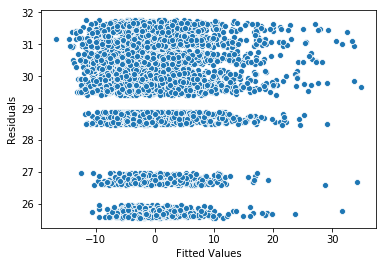

In [31]:
# enter your code here
pp = sns.scatterplot(result.resid,result.fittedvalues)
#pp = sns.scatterplot(result.fittedvalues,result.resid)
pp.set_xlabel("Fitted Values")
pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [32]:
dx = da[["BMXBMI","RIDAGEYR","RIAGENDRx","RIDRETH1x"]].dropna()    #we are restricting the dataset so as to avoid values warning later on

In [33]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x",data = dx)
result_new2 = model.fit()
print(result_new2.summary())

                            OLS Regression Results                            
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           3.98e-59
Time:                        07:33:45   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

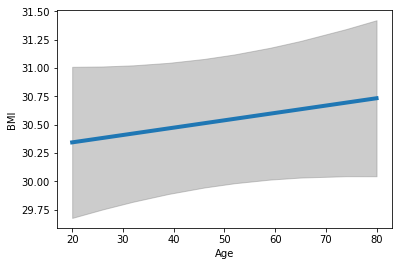

In [34]:
# enter your code here
from statsmodels.sandbox.predict_functional import predict_functional
values = {"RIDRETH1x":"Mexican American","RIAGENDRx":"Male"}
pr,ci,fv = predict_functional(result_new2,"RIDAGEYR",values = values,ci_method = "simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, ci[:, 0], ci[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

In [35]:
# enter your code here
from statsmodels.graphics.regressionplots import add_lowess


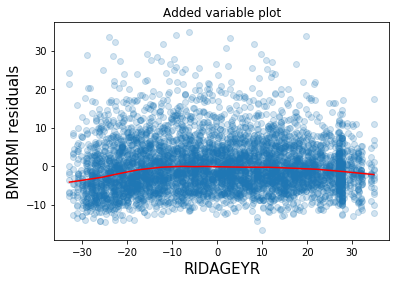

In [36]:
model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x",data = da)
result = model.fit()
fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [37]:
da = pd.read_csv(url)
da["ALQ110x"] = da.ALQ110.replace({2:0,7:np.nan,9:np.nan})
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male",2:"Female"})
vars = ["RIAGENDRx","DMDEDUC2","RIDAGEYR","ALQ110x"]
da = da[vars].dropna()

In [38]:
table = pd.crosstab(da.RIAGENDRx,da.ALQ110x).apply(lambda x:x/x.sum(),axis = 1)
table.columns = ["1-p","p"]
table

,1-p,p
RIAGENDRx,,
Female,0.550492,0.449508
Male,0.541667,0.458333


In [39]:
table["odds"] =  table.loc[:,"p"] / table.loc[:,"1-p"] 
table["log odds"] = np.log(table.loc[:,"odds"])
table

,1-p,p,odds,log odds
RIAGENDRx,,,,
Female,0.550492,0.449508,0.816558,-0.202657
Male,0.541667,0.458333,0.846154,-0.167054


In [40]:
#ODDS RATIO
table.odds.Female / table.odds.Male

0.9650236127508856

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

no.The fact that the log odds for females is negative reflects that fact that substantially less than 50% of females have a history of DRINKING

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

FEMALE DRINK ALCOHOL 0.96 TIMES OF THE MEN DRINKING ALCOHOL

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [41]:
# enter your code here
model = sm.GLM.from_formula("ALQ110x ~ RIAGENDRx",family = sm.families.Binomial(),data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ALQ110x   No. Observations:                 1575
Model:                            GLM   Df Residuals:                     1573
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1084.4
Date:                Sat, 06 Jun 2020   Deviance:                       2168.8
Time:                        07:33:51   Pearson chi2:                 1.58e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2027      0.060     -3.372      0.001      -0.320      -0.085
RIAGENDRx[T.Male]     0.0356      0.112      0.319      0.750      -0.183       0.254
=====================================================================================
"""

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

MALE DRINK 0.0356 UNITS MORE THAN WOMEN

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

QUESTION IS WRONG

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [42]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan}).dropna()

In [43]:
# enter your code here
model = sm.GLM.from_formula("ALQ110x ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x",family = sm.families.Binomial(),data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ALQ110x   No. Observations:                 1574
Model:                            GLM   Df Residuals:                     1567
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1059.5
Date:                Sat, 06 Jun 2020   Deviance:                       2118.9
Time:                        07:33:53   Pearson chi2:                 1.57e+03
No. Iterations:                     4   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4296      0.185     -2.316      0.021      -0.793      -0.066
RIAGENDRx[T.Male]            0.0172      0.114      0.151      0.880      -0.205       0.240
DMDEDUC2x[T.HS]             -0.0873      0.157     -0.556      0.578      -0.395       0.221
DMDEDUC2x[T.SomeCollege]     0.0536      0.146      0.367      0.713      -0.232       0.339
DMDEDUC2x[T.lt9]            -0.8972      0.171     -5.253      0.000      -1.232      -0.562
DMDEDUC2x[T.x9_11]          -0.4886      0.182     -2.681      0.007      -0.846      -0.131
RIDAGEYR                     0.0086      0.003      2.951      0.003       0.003       0.014
============================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

education and age(as lower p_values)

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

0

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

0.92

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

yes it decreased so negative correlation between gender and the added covariates

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

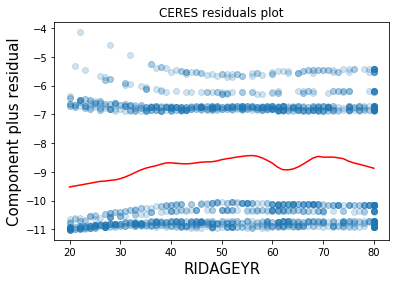

In [44]:
# enter your code here
# enter your code here
fig = result.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)


__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?

yes